# [OpenAi completion/ai function](../openai_cli/completion/functions/root.py)

In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions.root import ai_function
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.92.1.


In [2]:
input_image = file.load_image(
    os.path.join(
        os.getenv("HOME",""),
        "git/blue-bracket/images/portal-34.jpg")
        )[1]

In [3]:
func = ai_function(
    inputs = ["an image as a numpy array"],
    returns = ["a darker version of the input image as a numpy array"],
    requirements = [
        "does not run a for loop on the pixels",
        "uses numpy vector functions",
        "imports all modules that are used in the code"
    ],
    output_class_name="ndarray",
    verbose=False,
)

ai_function.prompt=Write a python function named ai_function_86677399
that inputs an image as a numpy array
and does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code
and returns a darker version of the input image as a numpy array.


In [4]:
assert func.generate(validation_input = input_image)

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=15300 request_id=4c3db3e4aec0c9dc77afa9575865b9be response_code=200
openai-cli.complete(): finish_reason: stop.
code: 

import numpy as np
from PIL import Image

def ai_function_86677399(image):
    # Convert the input image to a numpy array
    image_arr = np.array(Image.fromarray(image))
    
    # lightness is a function that takes as input a 3D array of values representing an RGB image and returns a 2D array
    # representing the lightness of the image, calculated as average of the maximum and minimum values of the three channels
    # (in the case of RGB images)
    image_lightness = np.average([np.amax(image_arr, axis=2), np.amin(image_arr, axis=2)], axis=0)

    # The output image is the original image with its lightness decreased 
    darker_image_arr = np.clip(image_arr * (1 - (image_lightness / 255)), 0,

In [5]:

image_output = func.compute(input_image)
assert image_output is not None

ai_function.compute(ndarray)
-> ndarray


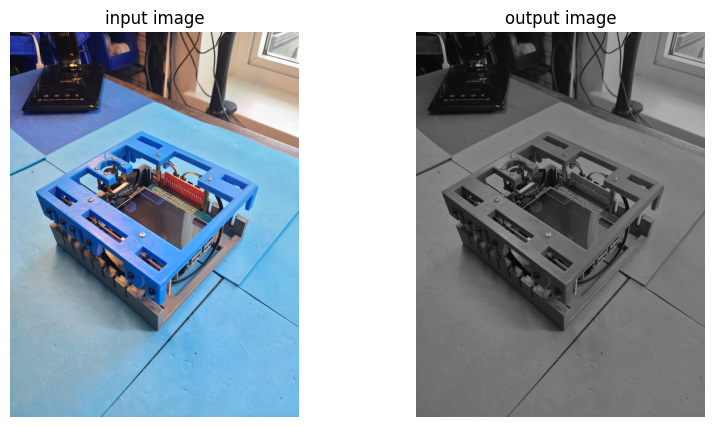

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [7]:
# END